<a href="https://colab.research.google.com/github/nathgc/Machine-Learning-Estudos/blob/main/decision_tree_with_moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

This project requires Python 3.7 or above:

In [ ]:
# testando versão do python se ela é >= 3.7
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [ ]:
#testando versão scikit learn >= 1.0.1
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [ ]:
import matplotlib.pyplot as plt

#plt.rc define os padrões que serão usados para as figuras no notebook
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/decision_trees` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Training and Visualizing a Decision Tree

In [ ]:
#importa o dataset com os dados das "luas"
from sklearn.datasets import make_moons

#Importa o classificador Árvore de decisão
from sklearn.tree import DecisionTreeClassifier

#Importa o separador de amostras de treino e teste
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

#Usa dataset moons e divide em amostra de treino e amostra de tete (80%-20%)
X,y = make_moons(n_samples=10000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

tree_clf = DecisionTreeClassifier()
parameters = {"max_leaf_nodes":[2,3,4,5,6], "max_depth":[2,3,4,5]}

grid = GridSearchCV(estimator = tree_clf,param_grid= parameters, cv=5)

grid.fit(X_train,y_train)

grid.best_params_

#max_depth profundidade máxima da árvore
#tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
#treinando o modelo
#tree_clf.fit(X_train, y_train)

{'max_depth': 2, 'max_leaf_nodes': 4}

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

yhat_test = tree_clf.predict(X_test)
# Compute accuracy based on test samples
acc = accuracy_score(y_test, yhat_test)
print(acc)

0.8485


In [8]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, test_size=0.2, random_state=42)

print(rs.split(X_train,y_train,))

<generator object BaseShuffleSplit.split at 0x7bfd30a644a0>


**This code example generates Figure 6–1. Iris Decision Tree:**

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  # path differs in the book
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

NameError: ignored

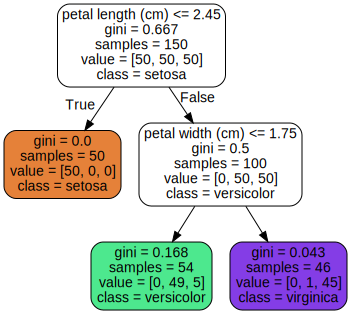

In [ ]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")  # path differs in the book

Graphviz also provides the `dot` command line tool to convert `.dot` files to a variety of formats. The following command converts the dot file to a png image:

In [ ]:
# extra code
!dot -Tpng {IMAGES_PATH / "iris_tree.dot"} -o {IMAGES_PATH / "iris_tree.png"}